#Ensamblaje
Agrega resultados de diferentes algoritmos o distintas instancias del mismo algoritmo, para obtener una mejor predicción

#1. Voting

In [3]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
X, y = load_iris(return_X_y=True)

In [4]:
y=np.where(y==2,1,0)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y
)

In [6]:
from sklearn.ensemble import VotingClassifier

model1=LogisticRegression()
model2=SVC(probability=True)
model3=RandomForestClassifier()


In [7]:
model3

RandomForestClassifier()

In [10]:
voting_model = VotingClassifier (
    estimators=[("Logística", model1),
               ("SV Machine", model2),
               ("RandomForest", model3)],
    voting="soft")

voting_model = voting_model.fit(X_train, y_train)

In [11]:
voting_model.predict(X_test)

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1])

In [12]:
voting_model.get_params()

{'estimators': [('Logística', LogisticRegression()),
  ('SV Machine', SVC(probability=True)),
  ('RandomForest', RandomForestClassifier())],
 'flatten_transform': True,
 'n_jobs': None,
 'verbose': False,
 'voting': 'soft',
 'weights': None,
 'Logística': LogisticRegression(),
 'SV Machine': SVC(probability=True),
 'RandomForest': RandomForestClassifier(),
 'Logística__C': 1.0,
 'Logística__class_weight': None,
 'Logística__dual': False,
 'Logística__fit_intercept': True,
 'Logística__intercept_scaling': 1,
 'Logística__l1_ratio': None,
 'Logística__max_iter': 100,
 'Logística__multi_class': 'auto',
 'Logística__n_jobs': None,
 'Logística__penalty': 'l2',
 'Logística__random_state': None,
 'Logística__solver': 'lbfgs',
 'Logística__tol': 0.0001,
 'Logística__verbose': 0,
 'Logística__warm_start': False,
 'SV Machine__C': 1.0,
 'SV Machine__break_ties': False,
 'SV Machine__cache_size': 200,
 'SV Machine__class_weight': None,
 'SV Machine__coef0': 0.0,
 'SV Machine__decision_function_sh

In [13]:
yhat_test = voting_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, yhat_test))

Accuracy: 0.9736842105263158


In [14]:
voting_model.predict_proba(X_test)

array([[9.55414663e-01, 4.45853366e-02],
       [3.56994339e-02, 9.64300566e-01],
       [8.33089736e-01, 1.66910264e-01],
       [9.99571734e-01, 4.28266397e-04],
       [6.45692337e-02, 9.35430766e-01],
       [9.99420355e-01, 5.79645200e-04],
       [9.99331811e-01, 6.68188605e-04],
       [4.78107045e-02, 9.52189296e-01],
       [2.25515069e-02, 9.77448493e-01],
       [9.89567687e-01, 1.04323134e-02],
       [9.07145541e-01, 9.28544594e-02],
       [9.95907849e-01, 4.09215062e-03],
       [9.98995402e-01, 1.00459832e-03],
       [1.68327178e-01, 8.31672822e-01],
       [1.36829105e-01, 8.63170895e-01],
       [7.97187255e-01, 2.02812745e-01],
       [9.99240071e-01, 7.59928981e-04],
       [3.25211973e-03, 9.96747880e-01],
       [8.76619735e-02, 9.12338027e-01],
       [9.97323490e-01, 2.67650971e-03],
       [8.26613038e-01, 1.73386962e-01],
       [9.99114214e-01, 8.85786083e-04],
       [1.98490244e-02, 9.80150976e-01],
       [9.95811625e-01, 4.18837468e-03],
       [3.814226

#2. Stacking

In [15]:
from sklearn.datasets import load_iris
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [16]:
model1=RandomForestClassifier(n_estimators=10, random_state=42)
model2=make_pipeline(StandardScaler(), SVC(random_state=42, probability=True))


In [17]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(probability=True, random_state=42))])

In [18]:
yhat1=model1.predict_proba(X_train)[:,1]
yhat2=model2.predict_proba(X_train)[:,1]


In [19]:
Y_predichas=pd.DataFrame({'yhat1':yhat1,'yhat2':yhat2})
final_estimator=LogisticRegression()
final_estimator.fit(Y_predichas, y_train)

LogisticRegression()

In [20]:
estimators = [("rf", model1), ("svc", model2)]

In [25]:
clf = StackingClassifier (estimators=estimators,
                          final_estimator=final_estimator)


In [26]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9473684210526315

In [27]:
clf.final_estimator_.coef_

array([[2.55643023, 2.82339735]])

In [28]:
clf.final_estimator_.intercept_

array([-2.94235525])

#3. Bagging

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestRegressor


In [31]:
X = pd.read_csv("solubility_train.csv")
y = X['Solubility']
X = X.drop(columns=['Unnamed: 0','Solubility'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [34]:
X

,FP001,FP002,FP003,FP004,FP005,FP006,FP007,FP008,FP009,FP010,FP011,FP012,FP013,FP014,FP015,FP016,FP017,FP018,FP019,FP020,FP021,FP022,FP023,FP024,FP025,FP026,FP027,FP028,FP029,FP030,FP031,FP032,FP033,FP034,FP035,FP036,FP037,FP038,FP039,FP040,FP041,FP042,FP043,FP044,FP045,FP046,FP047,FP048,FP049,FP050,...,FP179,FP180,FP181,FP182,FP183,FP184,FP185,FP186,FP187,FP188,FP189,FP190,FP191,FP192,FP193,FP194,FP195,FP196,FP197,FP198,FP199,FP200,FP201,FP202,FP203,FP204,FP205,FP206,FP207,FP208,MolWeight,NumAtoms,NumNonHAtoms,NumBonds,NumNonHBonds,NumMultBonds,NumRotBonds,NumDblBonds,NumAromaticBonds,NumHydrogen,NumCarbon,NumNitrogen,NumOxygen,NumSulfer,NumChlorine,NumHalogen,NumRings,HydrophilicFactor,SurfaceArea1,SurfaceArea2
0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5.343673,3.367296,2.833213,3.433987,4.009916,5.264609,0.000000,0.000000,2.833213,3.862179,4.177811,0.584815,0.000000,0.000,0.000,0.000000,1.386294,-1.606542,6.812456,6.812456
1,0,1,0,1,1,1,1,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5.904108,3.912023,3.295837,3.970292,4.871752,4.684412,1.609438,0.000000,2.564949,5.315193,5.092358,0.642355,0.693147,0.375,0.000,0.000000,1.609438,-0.441330,9.753834,12.029604
2,1,1,1,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.334215,3.526361,2.772589,3.526361,3.705506,3.243492,1.609438,0.567077,1.945910,4.729818,4.023944,0.000000,1.098612,0.000,0.000,0.000000,0.693147,-0.384859,8.245324,8.245324
3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4.921877,3.295837,2.397895,3.295837,3.076971,1.379614,0.693147,0.804530,0.000000,4.465209,3.510455,0.000000,0.000000,0.000,0.000,0.000000,0.693147,-2.373472,0.000000,0.000000
4,0,0,1,1,1,1,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.441335,3.465736,2.772589,3.465736,3.705506,2.944766,1.791759,0.000000,1.945910,4.465209,3.317541,0.694335,0.000000,0.000,0.375,0.375000,0.693147,-0.070987,9.913535,9.913535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4.845210,2.772589,2.302585,2.772589,2.924466,1.852753,0.000000,0.941208,0.000000,2.642633,2.372566,0.584815,1.098612,0.000,0.000,0.000000,0.693147,0.713897,10.916599,10.916599
947,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,4.683704,2.890372,2.197225,2.890372,2.759228,2.944766,0.693147,0.000000,1.945910,3.317541,2.886887,0.456826,0.000000,0.000,0.000,0.000000,0.693147,-0.169051,4.481002,4.481002
948,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.746757,3.135494,2.197225,3.091042,2.578583,0.798770,1.609438,0.567077,0.000000,4.177811,2.886887,0.000000,0.693147,0.000,0.000,0.000000,0.000000,-1.483783,5.456522,5.456522
949,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1

In [35]:
y

0     -3.97
1     -3.98
2     -3.99
3     -4.00
4     -4.06
       ... 
946   -1.26
947   -1.28
948   -1.30
949   -1.32
950   -1.34
Name: Solubility, Length: 951, dtype: float64

In [ ]:
#armo un bagging (buscar los mejores hiperparámetros de un modelo bagging)

In [44]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
bagging = BaggingRegressor (base_estimator = KNeighborsRegressor(5), n_estimators=10, max_samples=0.5, max_features=0.5 )

In [45]:
bagging.get_params()

{'base_estimator__algorithm': 'auto',
 'base_estimator__leaf_size': 30,
 'base_estimator__metric': 'minkowski',
 'base_estimator__metric_params': None,
 'base_estimator__n_jobs': None,
 'base_estimator__n_neighbors': 5,
 'base_estimator__p': 2,
 'base_estimator__weights': 'uniform',
 'base_estimator': KNeighborsRegressor(),
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 0.5,
 'max_samples': 0.5,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [46]:
KNeighborsRegressor().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [47]:
params={'base_estimator__n_neighbors': [5,10],
         'n_estimators': [10,20]}
# scoring: lista de metricas a obtener
scoring = ['neg_mean_squared_error', 'explained_variance', 'r2']

# creamos la GridSeacrh
grid_solver_knn = GridSearchCV(estimator = bagging, # model to train
                   param_grid = params, # param_grid
                   scoring = scoring,
                   cv = 5,
                   refit = 'neg_mean_squared_error',
                   verbose = 1)
grid_solver_knn.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=KNeighborsRegressor(),
                                        max_features=0.5, max_samples=0.5),
             param_grid={'base_estimator__n_neighbors': [5, 10],
                         'n_estimators': [10, 20]},
             refit='neg_mean_squared_error',
             scoring=['neg_mean_squared_error', 'explained_variance', 'r2'],
             verbose=1)

In [48]:
y_hat=grid_solver_knn.predict(X_test)
print("MSE KNN:", mean_squared_error(y_test,y_hat))
print("r2 score KNN:", r2_score(y_test,y_hat))
y_hat=grid_solver_knn.predict(X_train)
print("MSE KNN:", mean_squared_error(y_train,y_hat))
print("r2 score KNN:", r2_score(y_train,y_hat))

MSE KNN: 1.1031673080208335
r2 score KNN: 0.7325049319164019
MSE KNN: 0.6827837990175438
r2 score KNN: 0.8370872178879386


## Bagged Tree

In [53]:
from sklearn.tree import DecisionTreeRegressor
bagging_trees = BaggingRegressor (DecisionTreeRegressor(), n_estimators=100, max_samples=0.5, max_features=0.5)
bagging_trees.get_params()

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'squared_error',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeRegressor(),
 'max_features': 0.5,
 'max_samples': 0.5,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [54]:
params={ 'estimator__max_depth': [5],
        'estimator__max_features': [0.3,0.5],
 'n_estimators': [20]}
scoring = ['neg_mean_squared_error', 'explained_variance', 'r2']

# creamos la GridSeacrh
grid_solver_trees = GridSearchCV(estimator = bagging_trees, # model to train
                   param_grid = params, # param_grid
                   scoring = scoring,
                   cv = 5,
                   refit = 'neg_mean_squared_error',
                   verbose = 1)
grid_solver_trees.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=BaggingRegressor(estimator=DecisionTreeRegressor(),
                                        max_features=0.5, max_samples=0.5,
                                        n_estimators=100),
             param_grid={'estimator__max_depth': [5],
                         'estimator__max_features': [0.3, 0.5],
                         'n_estimators': [20]},
             refit='neg_mean_squared_error',
             scoring=['neg_mean_squared_error', 'explained_variance', 'r2'],
             verbose=1)

In [55]:
y_hat=grid_solver_trees.predict(X_train)
print("MSE Bagged Trees:", mean_squared_error(y_train,y_hat))
print("r2 score Bagged Trees:", r2_score(y_train,y_hat))
y_hat=grid_solver_trees.predict(X_test)
print("MSE Bagged Trees:", mean_squared_error(y_test,y_hat))
print("r2 score Bagged Trees:", r2_score(y_test,y_hat))

MSE Bagged Trees: 0.5113160058000132
r2 score Bagged Trees: 0.877999575907971
MSE Bagged Trees: 0.8626491480774684
r2 score Bagged Trees: 0.7908255702290241


##Random forest

In [56]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [57]:
n_cv=3
model = RandomForestRegressor()
params={'criterion':['squared_error'],
        'max_depth': [5,7],# Maxima pofundidad del arbol
        'max_features': [0.3, 0.7], # numero de features a considerar en cada split
        'max_samples' : [0.8,0.5],
        'max_leaf_nodes': [10,30], # maximo de nodos del arbol
        'min_impurity_decrease' : [0.05], # un nuevo nodo se harà si al hacerse se decrece la impurity en un threshold por encima del valor
        'min_samples_split': [5,10], # The minimum number of samples required to split an internal node:
        'n_estimators': [100] # numero de arboles
        }
# scoring: lista de metricas a obtener
scoring = ['neg_mean_squared_error', 'explained_variance', 'r2']


# creamos la GridSeacrh
grid_solver = GridSearchCV(estimator = model, # model to train
                           param_grid = params, # param_grid
                           scoring = scoring,
                           cv = n_cv,
                           refit = 'neg_mean_squared_error',
                           verbose = 1) # cuanto va a imprimir por pantalla
# entrenamos
model_result = grid_solver.fit(X,y)
model_result.best_estimator_

Fitting 3 folds for each of 32 candidates, totalling 96 fits


RandomForestRegressor(max_depth=7, max_features=0.7, max_leaf_nodes=30,
                      max_samples=0.5, min_impurity_decrease=0.05,
                      min_samples_split=5)

#4. Boosting

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (105, 4) (105,)
Test set: (45, 4) (45,)


##Adaboost

In [ ]:
clf = AdaBoostClassifier(n_estimators=10, learning_rate=0.1)

clf.fit(X_train, y_train)
yhat=clf.predict(X_test)
print("accuracy", accuracy_score(y_test, yhat))

accuracy 0.9111111111111111


In [ ]:
clf.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 0.1,
 'n_estimators': 10,
 'random_state': None}

##Gradient Boosting (GB)

In [ ]:
clf2 = GradientBoostingClassifier(learning_rate=0.05,
                                  n_estimators=100,
                                  tol=0.0001, #parametros propios del boosting, a partir de aquí del arbol
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  min_weight_fraction_leaf=0.0,
                                  max_depth=3,
                                  random_state=None,
                                  max_features=None)
clf2.fit(X_train, y_train)
yhat2 = clf2.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,yhat2))

Accuracy:  0.9555555555555556


##XGB

In [ ]:
X = pd.read_csv("solubility_train.csv")
y = X['Solubility']
X = X.drop(columns=['Unnamed: 0','Solubility'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

xgbmodel = XGBRegressor()
xgbmodel.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
params={'base_score': [0.5], # prediccion inicial
     'booster': ['gbtree'], # (gbtree, gblinear, dart)
     'colsample_bylevel': [1], # ratio de columnas en cada nivel
     'colsample_bytree': [0.7], # ratio de columnas por tree
     'gamma': [0.01],    # minimo "loss" reduccion para crear un nuevo split. Larger-> conservative
     'learning_rate': [0.1], # (eta) aportacion de cada arbol al modelo
     'max_depth': [3], # maxima profundidad en cada arbol
     'min_child_weight': [1], # minimo numero samples por hoja
    #'missing': [1], # si queremos reemplazar los missings por un numero
     'n_estimators': [100,150,200,250,300,350,400], # numero de arboles
     'n_jobs': [-1], # trabajos en paralelo
     'random_state': [0], # seed para generar los folds
     'reg_alpha': [0.1], # L1 regularitacion
     'reg_lambda': [0.01,0.1], # L2 regularitacion
     'scale_pos_weight': [1],
     'subsample': [0.9]} # ratio de muestras por cada arbol

In [ ]:
scoring = ['neg_mean_squared_error', 'explained_variance', 'r2']
grid_solver = GridSearchCV(estimator = xgbmodel, # model to train
                   param_grid = params,
                   scoring = scoring,
                   cv = 5,
                   n_jobs=-1,
                   refit='neg_mean_squared_error',
                   verbose = 2)


In [ ]:
model_result_xgboost = grid_solver.fit(X_train,y_train)
model_result_xgboost.best_params_



Fitting 5 folds for each of 14 candidates, totalling 70 fits


{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 0.7,
 'gamma': 0.01,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 400,
 'n_jobs': -1,
 'random_state': 0,
 'reg_alpha': 0.1,
 'reg_lambda': 0.1,
 'scale_pos_weight': 1,
 'subsample': 0.9}

In [ ]:
y_pred=model_result_xgboost.predict(X_train)
print("MSE train:", mean_squared_error(y_train,y_pred))
y_pred=model_result_xgboost.predict(X_test)
print("MSE test:", mean_squared_error(y_test,y_pred))


MSE train: 0.04522021544258073
MSE test: 0.3926266524787603


In [ ]:
model = xgb.XGBRegressor(n_estimators=500, max_depth=3,
                         learning_rate=0.1, early_stopping_rounds=20)
model.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)])


[0]	validation_0-rmse:1.88431	validation_1-rmse:2.10898
[1]	validation_0-rmse:1.75988	validation_1-rmse:1.94998
[2]	validation_0-rmse:1.65378	validation_1-rmse:1.82181
[3]	validation_0-rmse:1.55551	validation_1-rmse:1.69895
[4]	validation_0-rmse:1.46472	validation_1-rmse:1.58135
[5]	validation_0-rmse:1.38402	validation_1-rmse:1.48363
[6]	validation_0-rmse:1.31500	validation_1-rmse:1.40487
[7]	validation_0-rmse:1.25075	validation_1-rmse:1.32817
[8]	validation_0-rmse:1.19413	validation_1-rmse:1.26468
[9]	validation_0-rmse:1.14200	validation_1-rmse:1.20584
[10]	validation_0-rmse:1.09492	validation_1-rmse:1.14716
[11]	validation_0-rmse:1.05202	validation_1-rmse:1.10318
[12]	validation_0-rmse:1.01440	validation_1-rmse:1.06617
[13]	validation_0-rmse:0.98220	validation_1-rmse:1.03488
[14]	validation_0-rmse:0.95202	validation_1-rmse:1.00601
[15]	validation_0-rmse:0.92520	validation_1-rmse:0.98351
[16]	validation_0-rmse:0.89849	validation_1-rmse:0.96092
[17]	validation_0-rmse:0.87418	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=20,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

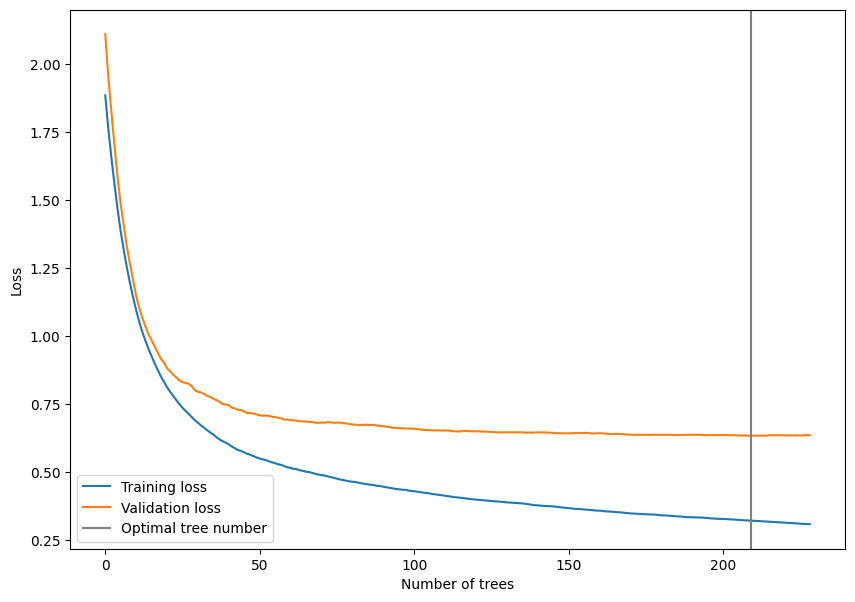

In [ ]:
results = model.evals_result()
total_trees=len(results["validation_0"]["rmse"]) #el numero total de arboles

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(total_trees-20, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()